In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16) 

In [2]:
# fedavg = json.load(open("./records/fedavg/global_cfmtx_record.json", "r"))
# scaffold = json.load(open("./records/scaffold/global_cfmtx_record.json", "r"))
proposal4 = json.load(open("./records/proposal4/global_cfmtx_record.json", "r"))
# pFedMe = json.load(open("../pFedMe/results/pFedMe/global_cfmtx_record.json", "r"))
# PerAvg = json.load(open("../pFedMe/results/PerAvg/global_cfmtx_record.json", "r"))

In [3]:
plot_data = {"pFedMe" : [], "PerAvg": [], "proposal4": []}
for r in range(10):
    # plot_data['pFedMe'].append(np.mean(np.diag(pFedMe[r])))
    # plot_data['PerAvg'].append(np.mean(np.diag(PerAvg[r])))
    plot_data['proposal4'].append(np.mean(np.diag(proposal4[r])))


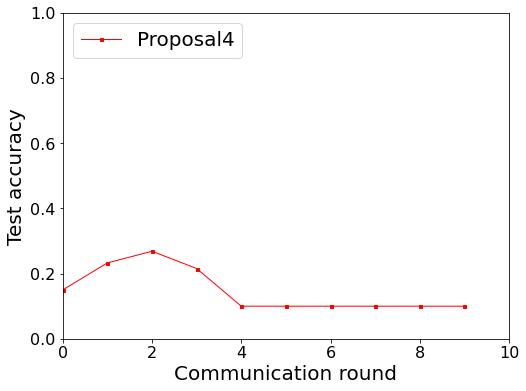

In [6]:
plt.figure(figsize=(8,6))
plt.xlabel("Communication round", fontsize=20)
plt.ylabel("Test accuracy", fontsize=20)

plt.plot(plot_data['proposal4'], label="Proposal4",
         color='red', linestyle='solid', marker='s',
         linewidth=1, markersize=3)
# plt.plot(plot_data['PerAvg'], label="PerAvg",
#          color='green', linestyle='solid', marker='o',
#          linewidth=1, markersize=3)
# plt.plot(plot_data['pFedMe'], label="pFedMe",
#          color='blue', linestyle='solid', marker='h',
#          linewidth=1, markersize=3)

plt.ylim(0,1)
plt.xlim(0,10)
plt.legend(loc="upper left", fontsize=20)
plt.show()